# **Chapter 2: Basic Python Data Operations**

***

According to the analytical skills that may be used in the process of EEG data processing, this chapter aimming to provide a basic tutorial of using Python to conduct matrix operations and statistical analysis is divided into three parts:

- **Part 1: Basic Matrix Operations**
- **Part 2: Basic Data Reading and Storage Operations**  
- **Part 3: Basic Statistical Analysis**  

## Download & Import Python Packages

In [1]:
!pip install h5py
!pip install neurora

import numpy as np
import h5py
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, f_oneway
from mne.stats import fdr_correction, f_mway_rm
from neurora.stuff import clusterbased_permutation_1d_1samp_1sided, permutation_test

# Part 1 Basic NumPy Matrix Operations

When processing data with Python, NumPy matrices are often the most likely data type to be used for analysis operations.  
In the first part, we will introduce some basic yet important NumPy matrix operations and their implementations that may be involved in the data analysis process later.

### Generating Matrices

In [2]:
# Generate a matrix filled with zeros with a shape of [3, 4]
A = np.zeros([3, 4])
print(A.shape)
print(A)

(3, 4)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [3]:
# Generate a matrix filled with ones with a shape of [3, 4]
A = np.ones([3, 4])
print(A.shape)
print(A)

(3, 4)
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [4]:
# Generate a random matrix with a shape of [3, 4] (random value between 0 and 1)
A = np.random.rand(3, 4)
print(A.shape)
print(A)

(3, 4)
[[0.85927125 0.09042675 0.35977717 0.38976772]
 [0.12480038 0.04279409 0.79621786 0.26838179]
 [0.83859091 0.65107625 0.46813622 0.2213184 ]]


In [5]:
# Generate a random matrix with a shape of [3, 4] (random value between 20 and 80)
A = np.random.uniform(low=20, high=80, size=[3, 4])
print(A.shape)
print(A)

(3, 4)
[[35.34624223 51.70435451 54.89319087 76.84740283]
 [22.62557883 34.88303208 54.53908846 45.46176174]
 [37.93664306 75.75541934 46.482998   46.75745108]]


### Flattening the Matrix into the Vector

In [6]:
A = np.ravel(A)
print(A.shape)
print(A)

(12,)
[35.34624223 51.70435451 54.89319087 76.84740283 22.62557883 34.88303208
 54.53908846 45.46176174 37.93664306 75.75541934 46.482998   46.75745108]


### Modifying Matrix Sizes (Reshaping the Matrix)

In [7]:
# Reshape A to have a shape of [3, 4]
A = np.reshape(A, (3, 4))
print(A.shape)
print(A)

(3, 4)
[[35.34624223 51.70435451 54.89319087 76.84740283]
 [22.62557883 34.88303208 54.53908846 45.46176174]
 [37.93664306 75.75541934 46.482998   46.75745108]]


### Matrix Transposition

#### 2-dimensional matrix transpose

In [8]:
A = A.T
print(A.shape)
print(A)

(4, 3)
[[35.34624223 22.62557883 37.93664306]
 [51.70435451 34.88303208 75.75541934]
 [54.89319087 54.53908846 46.482998  ]
 [76.84740283 45.46176174 46.75745108]]


#### high-dimensional matrix transpose

In [9]:
# First, generate a 3-dimensional matrix with a shape of [2, 3, 4]
B = np.random.rand(2, 3, 4)
print(B.shape)
print(B)

(2, 3, 4)
[[[0.08887657 0.81185784 0.43674234 0.13917904]
  [0.43650388 0.7579832  0.05575116 0.71765105]
  [0.67356096 0.06278106 0.12969217 0.58789923]]

 [[0.67327378 0.65579219 0.40618634 0.16132256]
  [0.53852417 0.20118353 0.09522027 0.11437295]
  [0.9461976  0.49369414 0.00979613 0.53558078]]]


In [10]:
# Transpose the matrix to have a shape of [2, 4, 3]
B = np.transpose(B, (0, 2, 1))
print(B.shape)
print(B)

(2, 4, 3)
[[[0.08887657 0.43650388 0.67356096]
  [0.81185784 0.7579832  0.06278106]
  [0.43674234 0.05575116 0.12969217]
  [0.13917904 0.71765105 0.58789923]]

 [[0.67327378 0.53852417 0.9461976 ]
  [0.65579219 0.20118353 0.49369414]
  [0.40618634 0.09522027 0.00979613]
  [0.16132256 0.11437295 0.53558078]]]


In [11]:
# Here's another example:
# Transpose the matrix with a shape of [2, 4, 3] to a matrix with a shape of [4, 3, 2]
B = np.transpose(B, (1, 2, 0))
print(B.shape)
print(B)

(4, 3, 2)
[[[0.08887657 0.67327378]
  [0.43650388 0.53852417]
  [0.67356096 0.9461976 ]]

 [[0.81185784 0.65579219]
  [0.7579832  0.20118353]
  [0.06278106 0.49369414]]

 [[0.43674234 0.40618634]
  [0.05575116 0.09522027]
  [0.12969217 0.00979613]]

 [[0.13917904 0.16132256]
  [0.71765105 0.11437295]
  [0.58789923 0.53558078]]]


### Matrix Merging

In [12]:
# First, generate a matrix with a shape of [4, 3, 3]
C = np.random.rand(4, 3, 3)
print(C.shape)
print(C)

(4, 3, 3)
[[[0.54097775 0.86698816 0.58483312]
  [0.23437147 0.40849197 0.83167704]
  [0.83501327 0.95855553 0.86017714]]

 [[0.14338173 0.54739155 0.87233469]
  [0.91881055 0.7611674  0.23184751]
  [0.36464208 0.21042842 0.57208841]]

 [[0.22374683 0.23947304 0.4821995 ]
  [0.21551198 0.40348035 0.29161474]
  [0.10976533 0.33309727 0.73266041]]

 [[0.2884525  0.19478007 0.29055851]
  [0.7934979  0.19275598 0.13680424]
  [0.7555624  0.79262956 0.85197504]]]


In [13]:
# Merge matrix B (with a shape of [4, 3, 2]) with matrix C (with a shape of [4, 3, 3])
# That is, merge along the third dimension, resulting in a matrix with a shape of [4, 3, 5]
D = np.concatenate((B, C), axis=2)
print(D.shape)
print(D)

(4, 3, 5)
[[[0.08887657 0.67327378 0.54097775 0.86698816 0.58483312]
  [0.43650388 0.53852417 0.23437147 0.40849197 0.83167704]
  [0.67356096 0.9461976  0.83501327 0.95855553 0.86017714]]

 [[0.81185784 0.65579219 0.14338173 0.54739155 0.87233469]
  [0.7579832  0.20118353 0.91881055 0.7611674  0.23184751]
  [0.06278106 0.49369414 0.36464208 0.21042842 0.57208841]]

 [[0.43674234 0.40618634 0.22374683 0.23947304 0.4821995 ]
  [0.05575116 0.09522027 0.21551198 0.40348035 0.29161474]
  [0.12969217 0.00979613 0.10976533 0.33309727 0.73266041]]

 [[0.13917904 0.16132256 0.2884525  0.19478007 0.29055851]
  [0.71765105 0.11437295 0.7934979  0.19275598 0.13680424]
  [0.58789923 0.53558078 0.7555624  0.79262956 0.85197504]]]


In [14]:
# Here's another example:
# Generate a matrix E with a shape of [1, 3, 2]
# Merge matrix B and matrix E to obtain a matrix F with a shape of [5, 3, 2]
E = np.random.rand(1, 3, 2)
F = np.concatenate((B, E), axis=0)
print(F.shape)
print(F)

(5, 3, 2)
[[[0.08887657 0.67327378]
  [0.43650388 0.53852417]
  [0.67356096 0.9461976 ]]

 [[0.81185784 0.65579219]
  [0.7579832  0.20118353]
  [0.06278106 0.49369414]]

 [[0.43674234 0.40618634]
  [0.05575116 0.09522027]
  [0.12969217 0.00979613]]

 [[0.13917904 0.16132256]
  [0.71765105 0.11437295]
  [0.58789923 0.53558078]]

 [[0.92851242 0.35363713]
  [0.7931884  0.28521754]
  [0.49304147 0.46184731]]]


### Averaging Values in a Matrix

In [15]:
# Avergae the values along the second dimension of matrix B (with a shape of [4, 3, 2])
B_mean = np.average(B, axis=1)
print(B_mean.shape)
print(B_mean)

(4, 2)
[[0.39964714 0.71933185]
 [0.54420737 0.45022328]
 [0.20739522 0.17040091]
 [0.48157644 0.27042543]]


### Converting Data to NumPy Matrix Format

In [16]:
G = [[1, 2], [3, 4]]
G_narry = np.array(G)
print(type(G))
print(type(G_narry))

<class 'list'>
<class 'numpy.ndarray'>


# Part 2 Basic Data Reading and Storage Operations

This part will introduce some basic operations for data (matrix) reading and storage based on Python

### Data Reading based on MNE

Refer to "Chapter 1: Preprocessing Single-subject Data" - "Step 1 Loading data" and "Step 8 Data Extraction".

### Storing and Reading Data with h5py

The h5py library can store data in a highly compressible HDF5 format file.  
HDF5 files are similar to MATLAB's .mat files.  
Both are composed of Keys and datasets.  
A Key can be understood as the name of the data, and a dataset can be understood as the specific data.  
However, HDF5 has stronger compression performance than .mat files.  
HDF5 files have the extension .h5.

#### Storing data with h5py

In [17]:
# Generate data with a shape of [4, 5]
testdata = np.random.rand(4, 5)
# Use h5py to store the data in a file named 'test_data.h5'
f = h5py.File('test_data.h5', 'w')
# Store the above testdata matrix using the Key+Dataset method,
# Here the Key is named 'data'
f.create_dataset('data', data=testdata)
# Close the file
f.close()

#### Reading data with h5py

In [18]:
# Read data
testdata = np.array(h5py.File('test_data.h5', 'r')['data'])
# Print the data
print(testdata.shape)
print(testdata)

(4, 5)
[[0.43343235 0.69462769 0.3665661  0.47958625 0.35730669]
 [0.17206018 0.35682949 0.17407036 0.77658902 0.89920726]
 [0.63977122 0.09463312 0.68503501 0.0165254  0.27782806]
 [0.63097528 0.04219303 0.78697826 0.54852194 0.06373638]]


### Storing and Reading Data with NumPy

NumPy's built-in save() function can store a two-dimensional matrix as a .npy file.  
Its built-in loadtxt() function can read data from a .npy file.

#### Storing matrix data with NumPy

In [19]:
# Store the matrix testdata in NumPy Array format in a file named 'test_data.npy'
np.save('test_data.npy', testdata)

#### Reading .npy file stored as NumPy matrix data

In [20]:
# Read 'test_data.npy'
testdata = np.load('test_data.npy')
# Print data info
print(testdata.shape)
print(testdata)

(4, 5)
[[0.43343235 0.69462769 0.3665661  0.47958625 0.35730669]
 [0.17206018 0.35682949 0.17407036 0.77658902 0.89920726]
 [0.63977122 0.09463312 0.68503501 0.0165254  0.27782806]
 [0.63097528 0.04219303 0.78697826 0.54852194 0.06373638]]


### Storing and Reading 2-Dimensional Matrices with NumPy

NumPy's built-in savetxt() function can store a two-dimensional matrix as a .txt file.  
Its built-in loadtxt() function can read data from a .txt file.

#### Storing 2-dimensional matrix data with NumPy

In [21]:
# Store the NumPy array-format matrix testdata in a file named 'test_data.txt'
np.savetxt('test_data.txt', testdata)

#### Reading .txt file stored 2-dimensional matrix data

In [22]:
# Read 'test_data.txt'
testdata = np.loadtxt('test_data.txt')
# Print data info
print(testdata.shape)
print(testdata)

(4, 5)
[[0.43343235 0.69462769 0.3665661  0.47958625 0.35730669]
 [0.17206018 0.35682949 0.17407036 0.77658902 0.89920726]
 [0.63977122 0.09463312 0.68503501 0.0165254  0.27782806]
 [0.63097528 0.04219303 0.78697826 0.54852194 0.06373638]]


Since the above methods based on NumPy are only suitable for two-dimensional data,  
if you really want to store multidimensional data, you can first reshape it into two-dimensional data before storing it.  
The following code is an example:

In [23]:
# Generate a 3-dimensional data with a shape of [2, 3, 4]
testdata_3d = np.random.rand(2, 3, 4)
# Reshape to [2, 12]
testdata_3d_to_2d = np.reshape(testdata_3d, (2, 12))
# Save as a .txt file
np.savetxt('test_data_3d_to_2d.txt', testdata_3d_to_2d)
# Read data
testdata_2d = np.loadtxt('test_data_3d_to_2d.txt')
# Reshape back to [2, 3, 4]
testdata_2d_to_3d = np.reshape(testdata_2d, (2, 3, 4))

### Reading .mat Files as NumPy Array

In Python, reading MATLAB's .mat format files is mainly done through the following two methods:

#### Reading with Scipy.io

The following code is just an example, with no actual data.  
filename is the address of the .mat file to be read, Key is the Key of the data to be read.

> import scipy.io as sio  
> data = np.array(sio.loadmat(filename)[Key])

#### Reading with h5py

h5py can also be used to read .mat files, following the same steps as for reading .h5 files.  
The above has been introduced, the following code is just an example, with no actual data.

> data = np.array(h5py.File(filename, 'r')[Key])

# Part 3: Basic Statistical Analysis

In this part, we will introduce a series of basic statistical operations when we conduct group analysis on EEG data from multiple subjects.

## Descriptive Statistics

First, let's introduce the calculation methods for a few commonly used descriptive statistics indicators:
- Mean
- Variance
- Standard deviation
- Standard error

Here, we generate some fictitious EEG data for subsequent statistical analysis examples.  
Assume we randomly generate the Event-Related Potentials (ERP) data of 100 subjects from -200ms to 1000ms (1200 time points, each corresponding to 1ms).

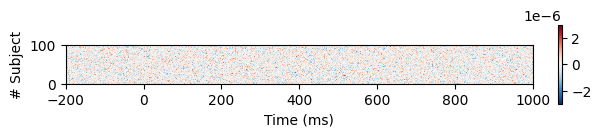

In [24]:
# Generate 'pseudo' EEG with a shape of [100, 1200]
data = np.random.uniform(low=-3e-6, high=3e-6, size=(100, 1200))
# Visual the data
plt.imshow(data, extent=[-200, 1000, 0, 100], cmap='RdBu_r')
plt.colorbar(fraction=0.008, ticks=[-2e-6, 0, 2e-6])
plt.xlabel('Time (ms)')
plt.ylabel('# Subject')
plt.show()

#### Calculate the mean ERP of 200 subjects

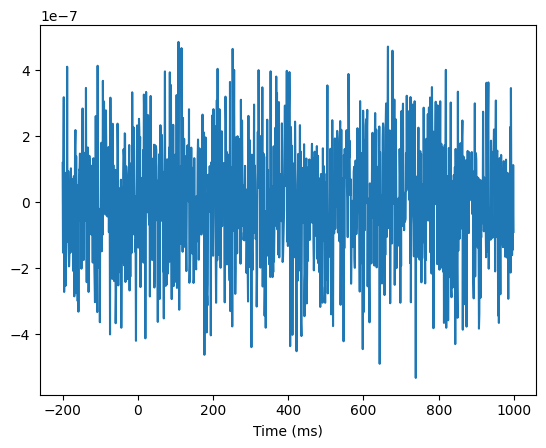

In [25]:
# Average across the dimensions of subjects
data_mean = np.mean(data, axis=0)
times = np.arange(-200, 1000)
# Visualize the mean 'pseudo' ERP
plt.plot(times, data_mean)
plt.xlabel('Time (ms)')
plt.show()

#### Calculate the variance (VAR) of ERP of 200 subjects

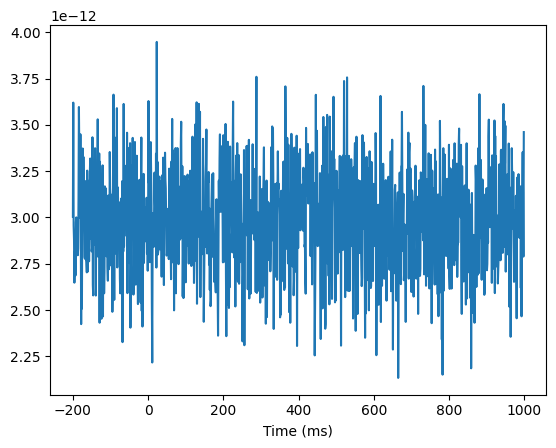

In [26]:
data_var = np.var(data, axis=0)
plt.plot(times, data_var)
plt.xlabel('Time (ms)')
plt.show()

#### Calculate the standard deviation (STD) of ERP of 200 subjects

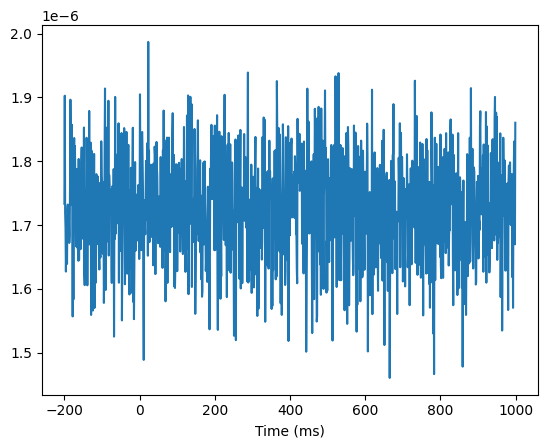

In [27]:
data_std = np.std(data, axis=0)
plt.plot(times, data_std)
plt.xlabel('Time (ms)')
plt.show()

#### Calculate the standard error (SEM) of ERP of 200 subjects

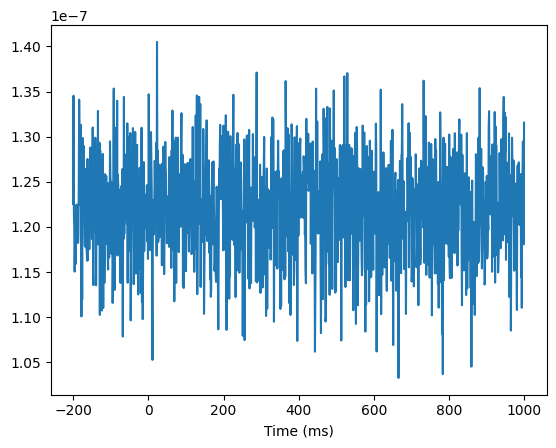

In [28]:
n_subjects = 200
data_sem = np.std(data, axis=0, ddof=0)/np.sqrt(n_subjects)
plt.plot(times, data_sem)
plt.xlabel('Time (ms)')
plt.show()

## Inferential Statistics

In EEG research, besides calculating the mean and dispersion of EEG data, it often involves making some inferences about population characteristics.  
Without going into basic concepts again, we only introduce commonly used significance testing methods below.

### Testing a Single Group

When it's necessary to test whether the data under a certain condition significantly differ from a specific value, one-sample t-tests or permutation tests are commonly used.  
Here, like the previous example, we randomly generate data of 1200 time points for 20 subjects for subsequent examples.

In [29]:
# Generate ‘pseudo’ EEG data with a shape of [20, 1200], with random values ranging from -0.1 to 0.4.
data = np.random.uniform(low=-0.5, high=0.55, size=(20, 1200))

#### Parametric testing method: One-sample t-test (uncorrected)

Conduct statistical tests assuming the data values are greater than 0 at each time point.

(1200,)


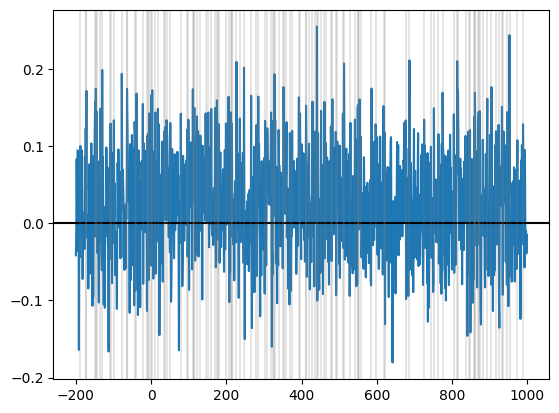

In [30]:
# One-sample t-test
t_vals, p_vals = ttest_1samp(data, 0, axis=0, alternative='greater')
# Print the shape of p-values: [1200] corresponding to 1200 time-points
print(np.shape(p_vals))
# Visualize the results after statistical testing
# Shadowed vertical lines represent significant time-points
plt.plot(times, np.average(data, axis=0))
plt.axhline(y=0, color='black')
for i, p_val in enumerate(p_vals):
    if p_val < 0.05:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.show()

#### Non-parametric testing method: Permutation test (uncorrected)

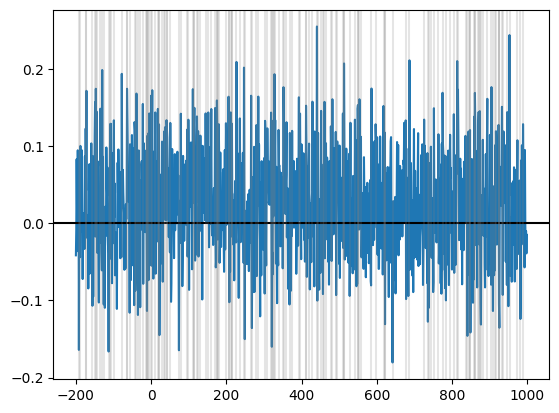

In [31]:
# The permutation_test() function in the stuff module of NeuroRA
# can perform permutation tests between two samples
# Generate a zero vector of shape [20]
zeros = np.zeros([20])
# Initialize a p_vals vector to store the calculated p-values
p_vals = np.zeros([1200])
# Calculate the p-value for each time point
for t in range(1200):
    p_vals[t] = permutation_test(data[:, t], zeros)
# Visualize the results after statistical testing
plt.plot(times, np.average(data, axis=0))
plt.axhline(y=0, color='black')
for i, p_val in enumerate(p_vals):
    if p_val < 0.05:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.show()

However, if conducting exploratory analysis to find significant differences at time points, it's necessary to correct the results to avoid false positives due to multiple comparisons.  
Common methods include:  
- Bonferroni correction for controlling the familywise error rate (FWER)
- False discovery rate (FDR) correction
- Cluster-based permutation test

#### Bonferroni (FWER) correlation

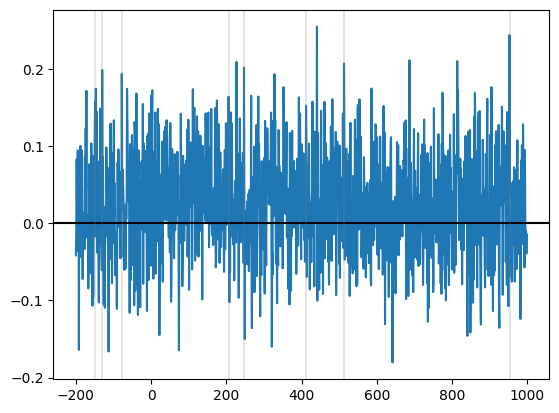

In [32]:
# Bonferroni correction simply involves multiplying the p-values by the number of statistical tests conducted
# Here, this means multiplying by the number of time-points
p_bf_corrected_vals = p_vals*len(times)
# Visualize the results after statistical testing
plt.plot(times, np.average(data, axis=0))
plt.axhline(y=0, color='black')
for i, p_val in enumerate(p_bf_corrected_vals):
    if p_val < 0.05:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.show()

#### FDR correlation

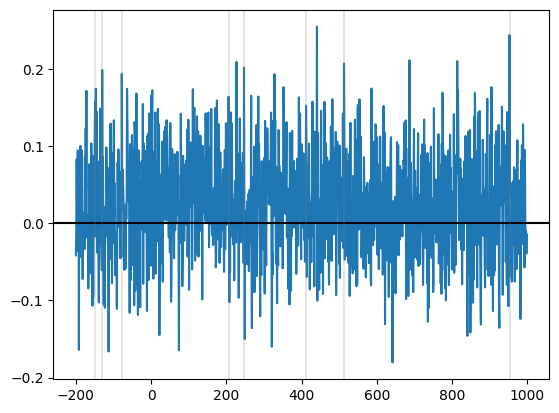

In [33]:
# FDR correction can be implemented using the fdr_correction() function in the stats module of MNE
# The first return value is a boolean array indicating whether the correction passed
# (True means it remains significant after correction),
# and the second return value is the corrected p-values
rejects, p_fdr_corrected_vals = fdr_correction(p_vals, alpha=0.05)
# Visualize the results after statistical testing
plt.plot(times, np.average(data, axis=0))
plt.axhline(y=0, color='black')
for i, p_val in enumerate(p_fdr_corrected_vals):
    if p_val < 0.05:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.show()

#### Cluster-based permutation test


Permutation test
Calculating: [====================================================================================================] 100.00%
Cluster-based permutation test finished!



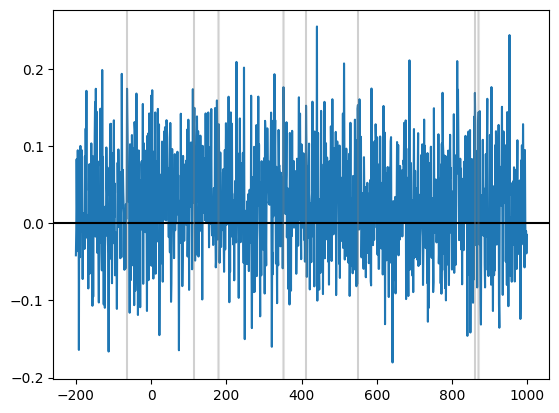

In [34]:
# Here is the one-sample one-sided cluster-based permutation test for time series (1D) data
# It can be performed using the clusterbased_permutation_1d_1samp_1sided() function in the stuff module of NeuroRA
# This function requires the data for statistical analysis (i.e., the data here) as input,
# and outputs a matrix indicating whether the results are significant after correction (1 for significant points)
# Here, we first use a p<0.05 threshold to select clusters, with the parameter set to p_threshold=0.05
# Then, we use a p<0.05 threshold for cluster-based correction, with the parameter set to clusterp_threshold=0.05
rejects = clusterbased_permutation_1d_1samp_1sided(data, level=0, 
                                                   p_threshold=0.05, 
                                                   clusterp_threshold=0.05)
# Visualize the results after statistical testing
plt.plot(times, np.average(data, axis=0))
plt.axhline(y=0, color='black')
for i, reject in enumerate(rejects):
    if reject == 1:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.show()

### Comparing Significant Differences between Two Conditions/Groups

When it's necessary to compare whether there is a significant difference in brain activity between two conditions,  
independent samples t-tests (for between-subject variables), paired samples t-tests (for within-subject variables), or permutation tests can be used.

#### Parametric testing method: Independent samples t-test (FDR correction)

Here, we randomly generate two sets of 'pseudo' EEG data,  
assuming they respectively represent data from a health control group (data1) and a patient group (data2).  
The normal group has 20 subjects, the patient group has 18 subjects, and the epoch length remains 1200ms (1200 time points, from -200ms to 1000ms).

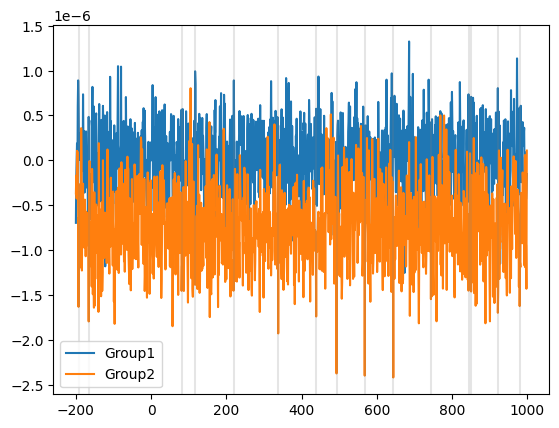

In [35]:
# Generate random data
data1 = np.random.uniform(low=-3e-6, high=3e-6, size=(20, 1200))
data2 = np.random.uniform(low=-4e-6, high=2.5e-6, size=(18, 1200))
# Independent samples t-test
t_vals, p_vals = ttest_ind(data1, data2, axis=0)
# FDR correction
rejects, p_fdr_corrected = fdr_correction(p_vals, alpha=0.05)
# Visualize the results after statistical testing
plt.plot(times, np.average(data1, axis=0), label='Group1')
plt.plot(times, np.average(data2, axis=0), label='Group2')
for i, reject in enumerate(rejects):
    if reject == True:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.legend()
plt.show()

#### Parametric testing method: Paired samples t-Test (FDR correction)

Here, we randomly generate two sets of 'pseudo' EEG data,  
assuming they represent the same group of subjects under two different conditions (condition 1 corresponds to data1, condition 2 corresponds to data2).  
The number of subjects is 20, and the epoch length remains 1200ms (1200 time points, from -200ms to 1000ms).

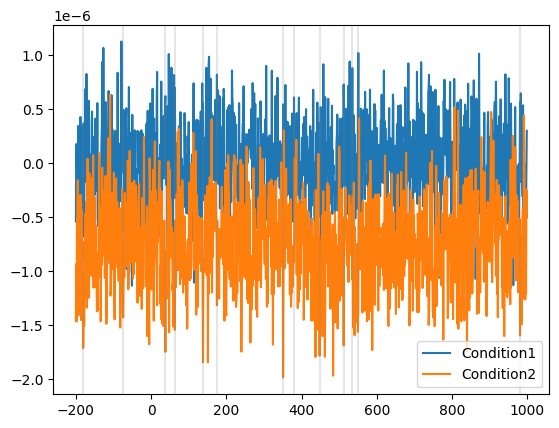

In [36]:
# Generate random data
data1 = np.random.uniform(low=-3e-6, high=3e-6, size=(20, 1200))
data2 = np.random.uniform(low=-4e-6, high=2.5e-6, size=(20, 1200))
# Paired samples t-test
t_vals, p_vals = ttest_rel(data1, data2, axis=0)
# FDR correction
rejects, p_fdr_corrected = fdr_correction(p_vals, alpha=0.05)
# Visualize the results after statistical testing
plt.plot(times, np.average(data1, axis=0), label='Condition1')
plt.plot(times, np.average(data2, axis=0), label='Condition2')
for i, reject in enumerate(rejects):
    if reject == True:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.legend()
plt.show()

#### Non-parametric testing method: Permutation test (FDR Correction)

Using the pseudo data example from the paired samples t-test above.

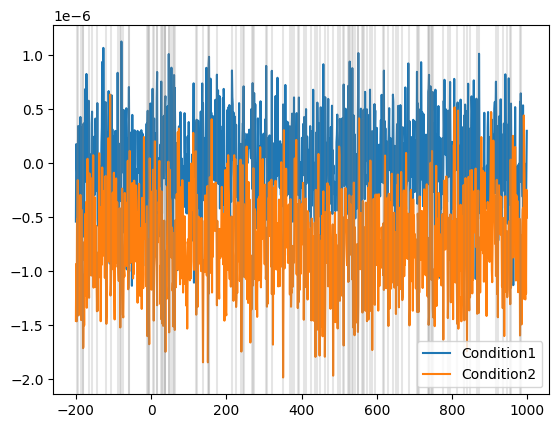

In [37]:
# Initialize a p_vals vector to store the calculated p-values
p_vals = np.zeros([1200])
# Calculate p-values for each time-point
for t in range(1200):
    p_vals[t] = permutation_test(data1[:, t], data2[:, t])
# FDR correlation
rejects, p_fdr_corrected = fdr_correction(p_vals, alpha=0.05)
# Visualize the results after statistical testing
plt.plot(times, np.average(data1, axis=0), label='Condition1')
plt.plot(times, np.average(data2, axis=0), label='Condition2')
for i, reject in enumerate(rejects):
    if reject == 1:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.legend()
plt.show()

### Comparing Significant Differences between Multiple Conditions/Groups

#### Parametric testing method: One-way ANOVA (FDR correction)

Here, similar to the previous example, we generate 'pseudo' EEG data for the same group of subjects under three different experimental conditions (corresponding to data1, data2, and data3).  
The number of subjects is 20, and the epoch length is 1200ms (1200 time points, from -200ms to 1000ms).

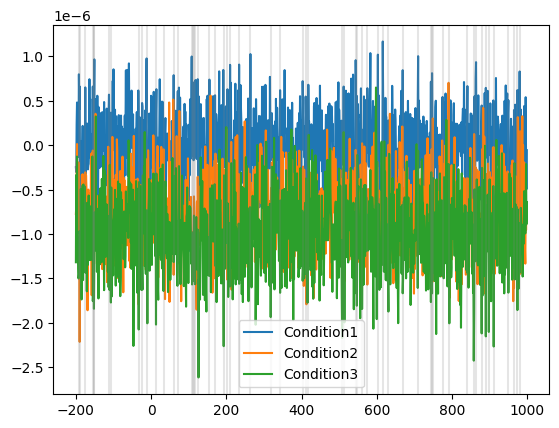

In [38]:
# Generate random data
data1 = np.random.uniform(low=-3e-6, high=3e-6, size=(20, 1200))
data2 = np.random.uniform(low=-4e-6, high=2.5e-6, size=(20, 1200))
data3 = np.random.uniform(low=-4.5e-6, high=2.5e-6, size=(20, 1200))
# one-way F-test
f_vals, p_vals = f_oneway(data1, data2, data3, axis=0)
# FDR correction
rejects, p_fdr_corrected = fdr_correction(p_vals, alpha=0.05)
# Visualize the results after statistical testing
plt.plot(times, np.average(data1, axis=0), label='Condition1')
plt.plot(times, np.average(data2, axis=0), label='Condition2')
plt.plot(times, np.average(data3, axis=0), label='Condition3')
for i, reject in enumerate(rejects):
    if reject == True:
        plt.axvline(x=times[i], color='grey', alpha=0.2)
plt.legend()
plt.show()

### Multifactorial Design: Interaction and Main Effects of Two Factors

#### Parametric testing method: 2×2 repeated measures ANOVA (FDR correction)

Assuming there are two within-subject variables: A and B.  
Each variable has two levels, making a total of 4 conditions.  
Here, we randomly generate 'pseudo' EEG data for 20 subjects under these 4 conditions.  
The epoch length is 1200ms (1200 time points, from -200ms to 1000ms).

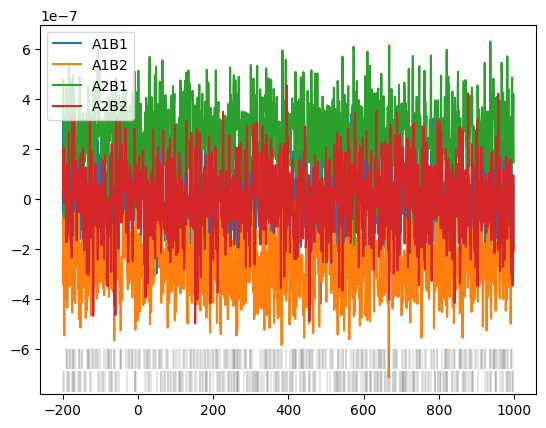

In [39]:
# Generate random data
data_A1B1 = np.random.uniform(low=-3e-6, high=3e-6, size=(200, 1200))
data_A1B2 = np.random.uniform(low=-3.5e-6, high=3e-6, size=(200, 1200))
data_A2B1 = np.random.uniform(low=-3e-6, high=3.5e-6, size=(200, 1200))
data_A2B2 = np.random.uniform(low=-3.5e-6, high=3.5e-6, size=(200, 1200))
# Reshape the data
reshaped_A1B1 = data_A1B1.reshape(200, 1, 1200)
reshaped_A1B2 = data_A1B2.reshape(200, 1, 1200)
reshaped_A2B1 = data_A2B1.reshape(200, 1, 1200)
reshaped_A2B2 = data_A2B2.reshape(200, 1, 1200)
# Merge the data in the order of the two factors (A1B1、A1B2、A2B1、A2B2)
data_combine = np.concatenate((reshaped_A1B1, reshaped_A1B2, 
                               reshaped_A2B1, reshaped_A2B2), axis=1)
# Set factor levels
factor_levels = [2, 2]
# Perform a 2×2 ANOVA using MNE's f_mway_rm function
# Main effect of factor A
f_main_A, p_main_A = f_mway_rm(data_combine, factor_levels, effects='A')
# Main effect of factor B
f_main_B, p_main_B = f_mway_rm(data_combine, factor_levels, effects='B')
# Interaction effect
f_inter, p_interaction = f_mway_rm(data_combine, factor_levels, effects='A:B')
# FDR correction
rejects_A, p_main_A = fdr_correction(p_main_A, alpha=0.05)
rejects_B, p_main_B = fdr_correction(p_main_B, alpha=0.05)
rejects_inter, p_interaction = fdr_correction(p_interaction, alpha=0.05)
# Visualize the results after statistical testing
# The three rows of gray vertical lines below the picture,
# from bottom to top, respectively represent the time points where the main effect of A,
# the main effect of B, and the interaction effect are significant.
plt.plot(times, np.average(data_A1B1, axis=0), label='A1B1')
plt.plot(times, np.average(data_A1B2, axis=0), label='A1B2')
plt.plot(times, np.average(data_A2B1, axis=0), label='A2B1')
plt.plot(times, np.average(data_A2B2, axis=0), label='A2B2')
for i in range(1200):
    if p_main_A[i] < 0.05:
        plt.axvline(x=times[i], ymin=0.01, ymax=0.06, color='grey', alpha=0.2)
    if p_main_B[i] < 0.05:
        plt.axvline(x=times[i], ymin=0.07, ymax=0.12, color='grey', alpha=0.2)
    if p_interaction[i] < 0.05:
        plt.axvline(x=times[i], ymin=0.13, ymax=0.18, color='grey', alpha=0.2)
plt.legend()
plt.show()